### 01. How to define Library? 

#### 01.01 How to define os, datetime, numpy,matplotlib and tensorflow ?

In [1]:
import os
from datetime import datetime

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf


#### 01.02. How to define tensorboard and matplotlib using magic command?

In [2]:

%matplotlib inline
%load_ext tensorboard

### 02. How to load MNIST dataset?

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

### 03. How to normalize?

In [6]:
x_train = x_train/np.float(np.max(x_train))
x_test = x_test/np.float(np.max(x_test))

In [7]:
type(x_train)

numpy.ndarray

### 04. How to reshape from 3 dimension to 4 dimension?(number,x,y,rgb)

In [8]:
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

In [9]:
print(x_train.shape , x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 05. How to define model?

In [10]:
model = tf.keras.models.Sequential()

#### 05.01. CNN for Feature Extraction

In [11]:
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='SAME',input_shape=(28,28,1),activation='relu'))

#### 05.02. Max Pooling

In [12]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='SAME'))

#### 05.03. Dropout 

In [13]:
model.add(tf.keras.layers.Dropout(0.5))

#### 05.04. Flatten()

In [14]:
model.add(tf.keras.layers.Flatten())

#### [05.05 Multi Layer Perceptron Used Xavier normal initial](https://keras.io/api/layers/initializers/#glorotnormal-class)

In [15]:
model.add(tf.keras.layers.Dense(units=10,kernel_initializer= tf.keras.initializers.GlorotNormal(),activation='softmax'))

### 06. How to define adam for optimizer?

In [16]:
adam = tf.keras.optimizers.Adam(0.01)

### 07. How to compile(not one-hot encoding) ?

In [17]:
model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['acc'])

### 08. How to visualize summary?

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                31370     
Total params: 31,530
Trainable params: 31,530
Non-trainable params: 0
_________________________________________________________________


### [09. How to make tensorborad](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks?)

#### 09.01 How to make log  path and directory?

In [19]:
logdir = os.path.join('logs',datetime.now().strftime('%Y%m%d%H%M%S'))

#### 09.02 How to set tensorboard parameter?

In [20]:
tensorboard = tf.keras.callbacks.TensorBoard(
    log_dir=logdir,
    write_graph = True,
    write_images = True,
    histogram_freq = 1
)

#### 09.03 How to play tensorboard use magic command?

In [21]:
%tensorboard --logdir logs --port 7777

Reusing TensorBoard on port 7777 (pid 6554), started 1:17:51 ago. (Use '!kill 6554' to kill it.)

### 09. How to make learning rate scheduler?

#### 09.01 Make a scheduler function

In [22]:
def schedule(epoch):
    return 0.01/(epoch+1)

#### 09.02 How to use Learning Rate Scheduler? (to view the learning rate, verbose=1)

In [23]:
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(schedule,verbose=1)

### 10. How to use checkpoint?

#### 10.01 Define the path

In [24]:
save_path = 'checkpoints'

#### 10.02 How to define checkpoint?

In [25]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_path,monitor='validation_loss',verbose=1,save_best_only=True,mode='max')

### 11. How to do fitting using LearningRate?

In [26]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=3,callbacks=[tensorboard,learning_rate_scheduler,checkpoint])

Train on 60000 samples, validate on 10000 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
Epoch 1/3
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2068 - acc: 0.9357 - val_loss: 0.0937 - val_acc: 0.9719

Epoch 00002: LearningRateScheduler reducing learning rate to 0.005.
Epoch 2/3
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1156 - acc: 0.9650 - val_loss: 0.0619 - val_acc: 0.9811

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0033333333333333335.
Epoch 3/3
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0965 - acc: 0.9700 - val_loss: 0.0558 - val_acc: 0.9815


In [27]:
model.predict(x_test)[0]

array([8.4148671e-10, 3.6260575e-10, 8.7098073e-08, 3.0489527e-05,
       3.4770749e-11, 5.8523643e-08, 1.8880851e-15, 9.9996209e-01,
       3.4969865e-08, 7.2228540e-06], dtype=float32)

### 12. How to use history?

#### 12.01 Check the key values

In [32]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])

#### 12.02 Check the hyper parameters

In [37]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 3,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 60000,
 'steps': 1875,
 'verbose': 0}

#### 12.03 Use the model from history

In [39]:
x_train[0].shape

(28, 28, 1)

In [46]:
np.argmax( history.model(x_train[0].reshape(1,28,28,1)) )

5

In [47]:
y_train[0]

5

#### 12.04 How to draw loss graph(train and validation)?

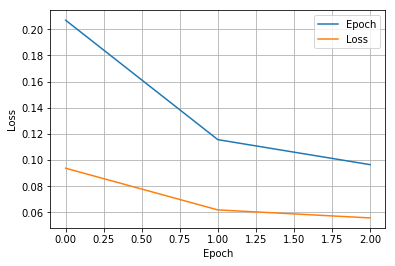

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Epoch','Loss'])
plt.grid()

### 13. How to draw accuracy graph?

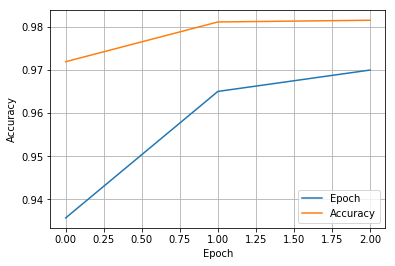

In [44]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Epoch','Accuracy'])
plt.grid()

### 14.How to evaluate ?

In [58]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.04929308197477367, 0.9859]